In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Downloads

C:\Users\shashank s\Downloads


In [3]:
data=pd.read_csv(r'Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.shape

(14640, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
data=data.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline_sentiment_gold',
               'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)
data.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   text               14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB


<Axes: xlabel='airline_sentiment', ylabel='count'>

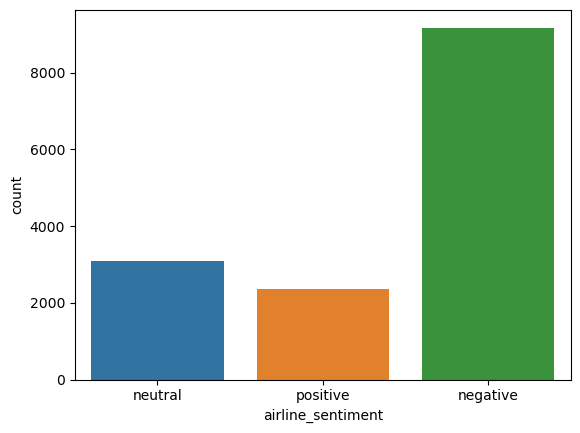

In [8]:
sns.countplot(x='airline_sentiment', data=data)

<Axes: ylabel='airline'>

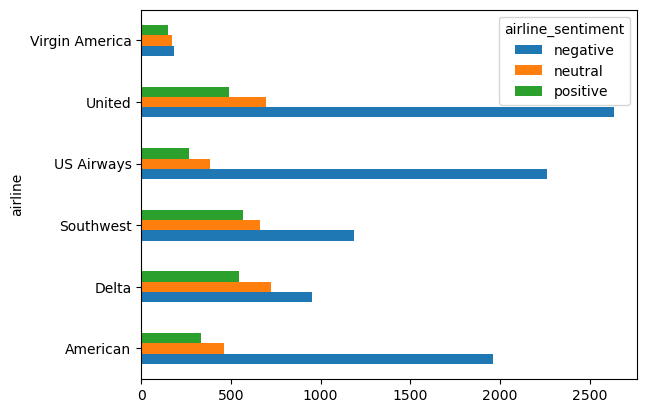

In [9]:
airline_sentiment= data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='barh')

In [10]:
for i in range(5):
    print("Tweet:  ",[i])
    print(data['text'].iloc[i],"\n")
    print("Sentiment:  ",data['airline_sentiment'].iloc[i], "\n\n")

Tweet:   [0]
@VirginAmerica What @dhepburn said. 

Sentiment:   neutral 


Tweet:   [1]
@VirginAmerica plus you've added commercials to the experience... tacky. 

Sentiment:   positive 


Tweet:   [2]
@VirginAmerica I didn't today... Must mean I need to take another trip! 

Sentiment:   neutral 


Tweet:   [3]
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse 

Sentiment:   negative 


Tweet:   [4]
@VirginAmerica and it's a really big bad thing about it 

Sentiment:   negative 




In [11]:
def no_of_words(text):
    words= text.split()
    word_count=len(words)
    return word_count

In [12]:
data['word count']=data['text'].apply(no_of_words)
data.head()

,airline_sentiment,airline,text,word count
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,4
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,9
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,12
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,17
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,10


In [13]:
data.airline_sentiment.replace("neutral", 1, inplace=True)
data.airline_sentiment.replace("positive", 2, inplace=True)
data.airline_sentiment.replace("negative", 3, inplace=True)

In [14]:
data.head()

,airline_sentiment,airline,text,word count
0,1,Virgin America,@VirginAmerica What @dhepburn said.,4
1,2,Virgin America,@VirginAmerica plus you've added commercials t...,9
2,1,Virgin America,@VirginAmerica I didn't today... Must mean I n...,12
3,3,Virgin America,@VirginAmerica it's really aggressive to blast...,17
4,3,Virgin America,@VirginAmerica and it's a really big bad thing...,10


In [15]:
features=data['text']
labels=data['airline_sentiment']

In [16]:
features.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [17]:
import re

processed_features= []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [18]:
data.head()

,airline_sentiment,airline,text,word count
0,1,Virgin America,@VirginAmerica What @dhepburn said.,4
1,2,Virgin America,@VirginAmerica plus you've added commercials t...,9
2,1,Virgin America,@VirginAmerica I didn't today... Must mean I n...,12
3,3,Virgin America,@VirginAmerica it's really aggressive to blast...,17
4,3,Virgin America,@VirginAmerica and it's a really big bad thing...,10


In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer(max_features= 2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features=vectorizer.fit_transform(processed_features).toarray()

In [20]:
labels.head()

0    1
1    2
2    1
3    3
4    3
Name: airline_sentiment, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(processed_features, labels, test_size=0.2, random_state= 42)
print("x_train size:  ",x_train.shape)
print("x_test size:  ", x_test.shape)
print("y_train size:  ", y_train.shape)
print("y_test size:  ", y_test.shape)

x_train size:   (11712, 2301)
x_test size:   (2928, 2301)
y_train size:   (11712,)
y_test size:   (2928,)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [23]:
model_prediction=model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
print("Accuracy score:  ", accuracy_score(y_test, model_prediction))

Accuracy score:   0.7650273224043715


In [26]:
print("Confusion matrix:\n  ",confusion_matrix(y_test, model_prediction ))

Confusion matrix:
   [[ 223   48  309]
 [  52  265  142]
 [  94   43 1752]]


In [27]:
print("Classification report:\n\n   ",classification_report(y_test, model_prediction))

Classification report:

                  precision    recall  f1-score   support

           1       0.60      0.38      0.47       580
           2       0.74      0.58      0.65       459
           3       0.80      0.93      0.86      1889

    accuracy                           0.77      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.75      0.77      0.75      2928



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [29]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 80.05%


In [30]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 289   36  255]
 [  55  289  115]
 [  89   34 1766]]


              precision    recall  f1-score   support

           1       0.67      0.50      0.57       580
           2       0.81      0.63      0.71       459
           3       0.83      0.93      0.88      1889

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [31]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 76.43%


In [32]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[ 189   17  374]
 [  38  216  205]
 [  45   11 1833]]


              precision    recall  f1-score   support

           1       0.69      0.33      0.44       580
           2       0.89      0.47      0.61       459
           3       0.76      0.97      0.85      1889

    accuracy                           0.76      2928
   macro avg       0.78      0.59      0.64      2928
weighted avg       0.77      0.76      0.73      2928



In [33]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 79.03%


In [34]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 307   51  222]
 [  54  311   94]
 [ 140   53 1696]]


              precision    recall  f1-score   support

           1       0.61      0.53      0.57       580
           2       0.75      0.68      0.71       459
           3       0.84      0.90      0.87      1889

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.716 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.724 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.717 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.715 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.703 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.773 total time=   0.1s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.780 total time=   0.1s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.769 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.768 total time=   0.1s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.769 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.781 total time=   0.2s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [36]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.78
best parameters:  {'C': 1, 'loss': 'hinge'}


In [37]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

Test accuracy: 79.58%
[[ 282   49  249]
 [  47  307  105]
 [ 103   45 1741]]


              precision    recall  f1-score   support

           1       0.65      0.49      0.56       580
           2       0.77      0.67      0.71       459
           3       0.83      0.92      0.87      1889

    accuracy                           0.80      2928
   macro avg       0.75      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [38]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 282   49  249]
 [  47  307  105]
 [ 103   45 1741]]


              precision    recall  f1-score   support

           1       0.65      0.49      0.56       580
           2       0.77      0.67      0.71       459
           3       0.83      0.92      0.87      1889

    accuracy                           0.80      2928
   macro avg       0.75      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928

